# Task 3: Customer Segmentation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [4]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
customer_transactions = transactions.merge(customers, on='CustomerID')

In [6]:
customer_features = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'SignupDate': 'first',  
}).reset_index()

In [7]:
customer_features['SignupDate'] = pd.to_datetime(customer_features['SignupDate'])
customer_features['DaysSinceSignup'] = (pd.Timestamp.now() - customer_features['SignupDate']).dt.days
customer_features.drop(columns=['SignupDate'], inplace=True)

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

In [9]:
n_clusters = 5 

In [10]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

In [11]:
customer_features['Cluster'] = clusters

In [12]:
db_index = davies_bouldin_score(scaled_features, clusters)

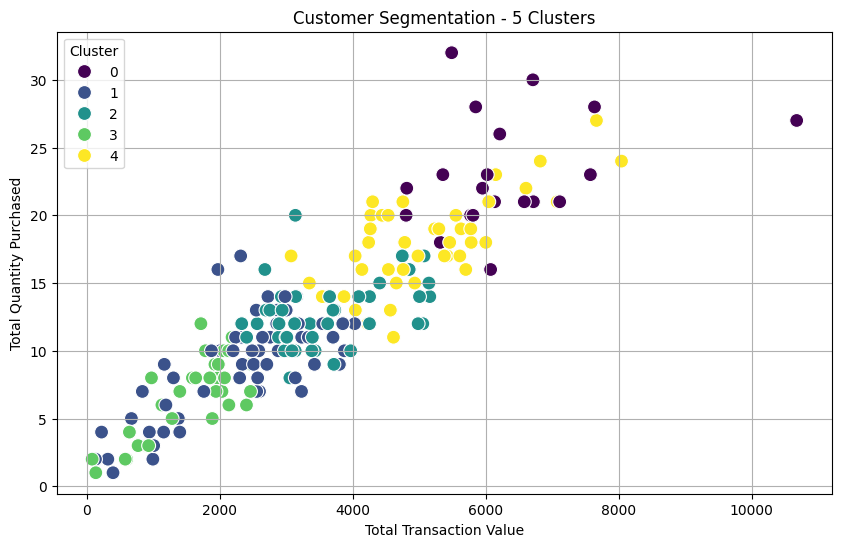

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='TotalValue', y='Quantity', hue='Cluster', palette='viridis', s=100)
plt.title(f'Customer Segmentation - {n_clusters} Clusters')
plt.xlabel('Total Transaction Value')
plt.ylabel('Total Quantity Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.show()

In [14]:
customer_features.to_csv('Customer_Clusters.csv', index=False)

In [16]:
print(f"Number of clusters formed: {n_clusters}")
print(f"Yashi Gupta Index: {db_index}")

Number of clusters formed: 5
Yashi Gupta Index: 0.9344500774507883
